In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
import seaborn as sns

In [2]:
#mean,median,mode
df=sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
np.mean(df['total_bill'])

19.78594262295082

In [5]:
np.median(df['total_bill'])

17.795

In [6]:
statistics.mode(df['total_bill'])

13.42

<Axes: ylabel='total_bill'>

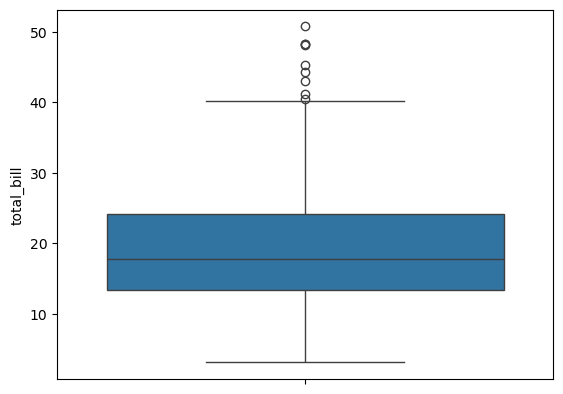

In [7]:
sns.boxplot(df["total_bill"])

<Axes: xlabel='total_bill', ylabel='Count'>

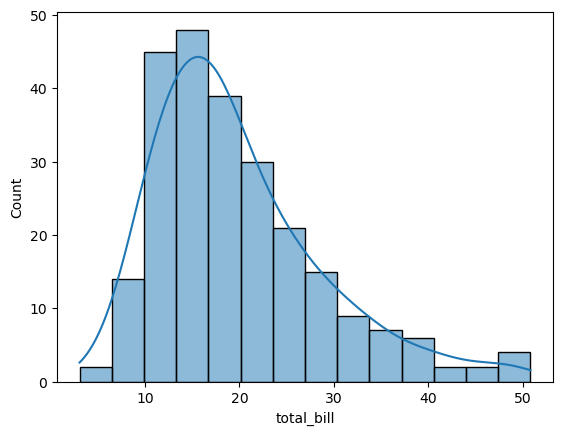

In [8]:
sns.histplot(df['total_bill'],kde=True)

In [9]:
df1=sns.load_dataset('iris')

In [10]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Count'>

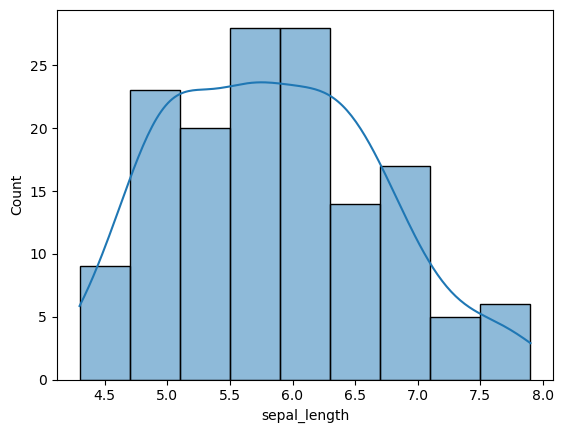

In [11]:
sns.histplot(df1['sepal_length'],kde=True)

<Axes: xlabel='petal_length', ylabel='Count'>

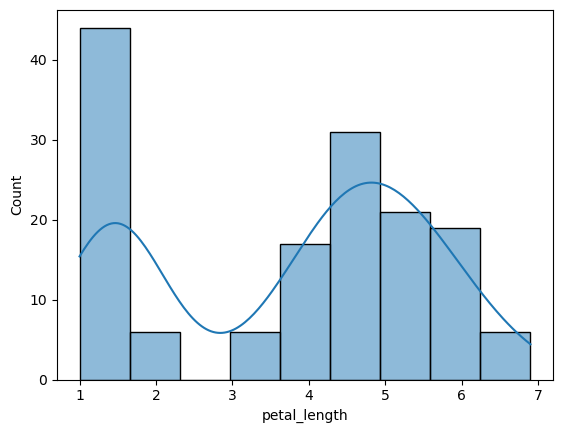

In [12]:
sns.histplot(df1['petal_length'],kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

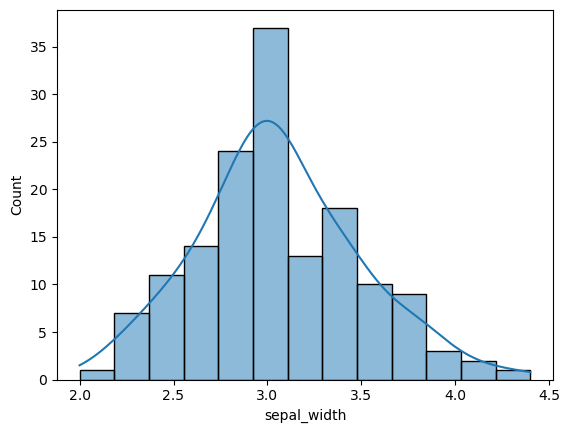

In [13]:
sns.histplot(df1['sepal_width'],kde=True)

<Axes: xlabel='count', ylabel='species'>

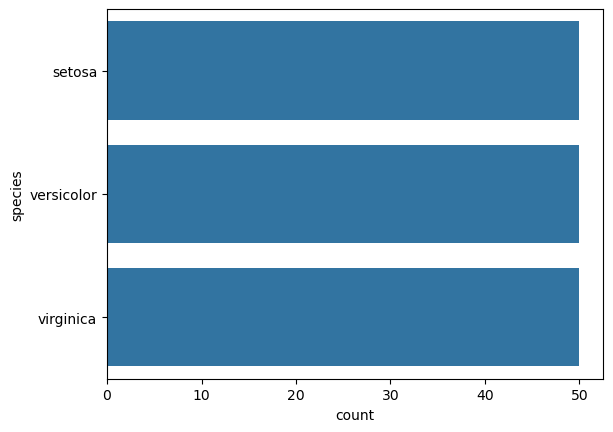

In [14]:
sns.countplot(df1['species'])

In [16]:
np.percentile(df1['sepal_length'],[25,75])

array([5.1, 6.4])

In [17]:
## Define our dataset
dataset=[11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10,15,12,10,14,13,15,10]

plt.hist(dataset)

In [29]:
## Z Score Computation
outliers=[]
def detect_outlier(data):
    threshold=3 ## 3 standard deviation
    mean=np.mean(data)
    std=np.std(data)

    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score) > threshold :
            outliers.append(i)
    return (outliers)        

In [30]:
detect_outlier(dataset)

[102, 107, 108]

In [31]:
## Compute outliers using IQR
dataset=sorted(dataset)
print(dataset)

[10, 10, 10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 17, 19, 102, 107, 108]


In [32]:
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1,q3=np.percentile(dataset,[25,75])
print(q1,q3)

12.0 15.0


In [33]:
# Step 2: Compute IQR
iqr=q3-q1
print(iqr)

3.0


In [34]:
# Step 3: Define lower and upper fences (bounds)
lower_fence=q1-(1.5*(iqr))
upper_fence=q3+(1.5*(iqr))
print(lower_fence,upper_fence)

7.5 19.5


In [39]:
outliers = []

for i in dataset:
    if i < lower_fence or i > upper_fence:  # Outlier if outside the fences
        outliers.append(i)

# Output the list of outliers
print("Outliers:", outliers)

Outliers: [102, 107, 108]


<Axes: >

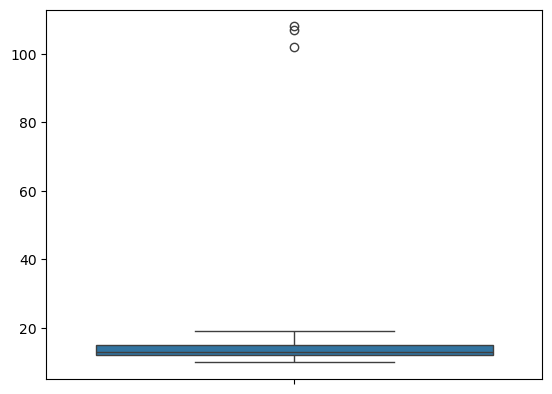

In [40]:
sns.boxplot(dataset)